In [1]:
#Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#importing the necessary packages

import psycopg2
import csv
import pandas as pd
import pandas.io.sql as sqlio

In [8]:
#Pulling the loaded data from postgreSQl and loading into a dataframe using try and exception blocks

#SQl query to pull the data
sql = "SELECT * FROM bank"

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "Sarath.58",
    host = "localhost",
    port = "5432",
    database = "bank_marketing")
    #creating the dataframe and loading into it
    df = sqlio.read_sql(sql, dbConnection)
except (Exception, psycopg2.Error) as dbError:
    print("Error while pulling the data: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [9]:
#Displaying the dataframe

df

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [10]:
d1 = pd.get_dummies(df["job"])
dfjob = d1.drop(["unknown"], axis = 1)
d2 = pd.get_dummies(df['education'])
maritaldf = d2.drop(['unknown'],axis=1)
d3 = pd.get_dummies(df['contact'])
contactdf = d3.drop(['unknown'],axis=1)
d4 = pd.get_dummies(df['poutcome'])
poutcomedf = d4.drop(['unknown'],axis=1)
label_deposit = LabelEncoder()
df["deposit"] = label_deposit.fit_transform(df["deposit"])
df

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [11]:
merged = pd.concat([df, dfjob, maritaldf, contactdf, poutcomedf],join='outer', axis=1)
merged.head()

,age,job,marital,education,defaulters,balance,housing,loan,contact,day,...,technician,unemployed,primary,secondary,tertiary,cellular,telephone,failure,other,success
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
1,56,admin,married,secondary,no,45,no,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,0,0,1,0,0,0,0,0,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
4,54,admin,married,tertiary,no,184,no,no,unknown,5,...,0,0,0,0,1,0,0,0,0,0


In [12]:
data = merged.drop(['marital','job', 'contact', 'poutcome', 'education', 'defaulters', 'housing', 'loan', 'day', 'month'], axis=1)
data

,age,balance,duration,campaign,pdays,previous,deposit,admin,blue-collar,entrepreneur,...,technician,unemployed,primary,secondary,tertiary,cellular,telephone,failure,other,success
0,59,2343,1042,1,-1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,56,45,1467,1,-1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,41,1270,1389,1,-1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,55,2476,579,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,54,184,673,2,-1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
11158,39,733,83,4,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11159,32,29,156,2,-1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
11160,43,0,9,2,172,5,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [13]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['deposit'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('deposit', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [57]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8371, 25)
Training Labels Shape: (8371,)
Testing Features Shape: (2791, 25)
Testing Labels Shape: (2791,)


In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [46]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [51]:
confusion_matrix(test_labels, predictions.round())

array([[1157,  293],
       [ 270, 1071]], dtype=int64)

In [53]:
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1450
           1       0.79      0.80      0.79      1341

    accuracy                           0.80      2791
   macro avg       0.80      0.80      0.80      2791
weighted avg       0.80      0.80      0.80      2791



In [58]:
#Rfc
rfc = RandomForestClassifier()
rfc.fit(train_features, train_labels)
pred_rfc = rfc.predict(test_features)

C:\Users\Gollamudi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [59]:
print(classification_report(test_labels, pred_rfc))
print(confusion_matrix(test_labels, pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1450
           1       0.79      0.73      0.76      1341

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791

[[1187  263]
 [ 357  984]]


In [37]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pydot

In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [33]:
import graphviz

In [34]:
from sklearn.tree import export_graphviz

In [36]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gollamudi\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    openssl-1.1.1d             |       he774522_2         4.8 MB
    ------------------------------------------------------------
                                           Total:        36.9 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main




openssl-1.1.1d       | 4.8 MB    |  

In [54]:
# Limit depth of tree to 3 levels
rfc_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rfc_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rfc_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

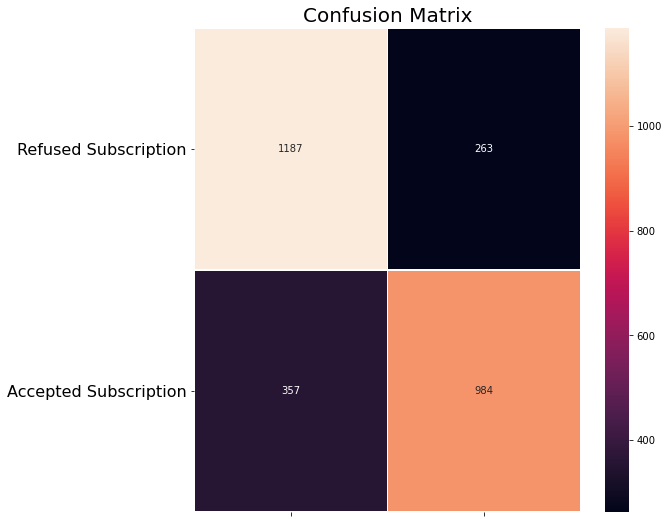

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from plotly import tools
conf_matrix = confusion_matrix(test_labels, pred_rfc)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused Subscription', 'Accepted Subscription'], fontsize=16, rotation=360)
plt.show()